# Global $\chi$ analysis

In [1]:
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
#import iris.plot as iplt
#import iris
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors


from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import geopandas as gpd
from geopandas import GeoDataFrame as gdf
import pandas as pd
import gc

## load data 

In [2]:
ds = xr.open_dataset("../nc_files/f09_mask.nc")
ds=ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180))
ds=ds.reindex(lon=sorted(ds.lon))

In [3]:
ds.sel(season=["JJA","DJF"])[["chi_abd","chi_opt1","chi_hyg"]]\
.to_dataframe().describe()

,chi_abd,chi_opt1,chi_hyg
count,108527.000000,65909.000000,86307.000000
mean,66.852661,68.226440,56.054493
std,12.486314,10.186817,11.827573
min,12.616662,38.242340,20.234201
25%,57.980553,61.400860,47.827744
50%,68.727936,70.339058,53.637234
75%,76.288803,75.866364,62.690895
max,93.622704,94.437447,86.626915


## chi_abd

### DJF

In [4]:
DJF=ds["chi_abd"].sel(season="DJF")
JJA=ds["chi_abd"].sel(season="JJA")

In [5]:
DJF.to_dataframe().describe()

,chi_abd
count,54490.000000
mean,64.301659
std,11.270273
min,19.223425
25%,57.199955
50%,64.782661
75%,72.478973
max,92.956490


<xarray.DataArray 'chi_abd' ()>
array(32.149376, dtype=float32)
Coordinates:
    season   <U3 'DJF'

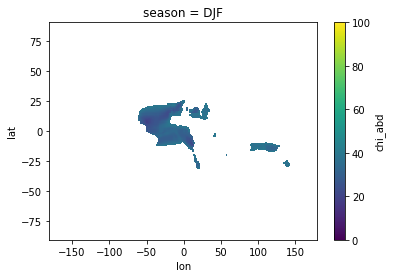

In [6]:
DJF.where(DJF<40).plot(vmin=0,vmax=100)
DJF.where(DJF<40).mean()

<xarray.DataArray 'chi_abd' ()>
array(75.94233, dtype=float32)
Coordinates:
    season   <U3 'DJF'

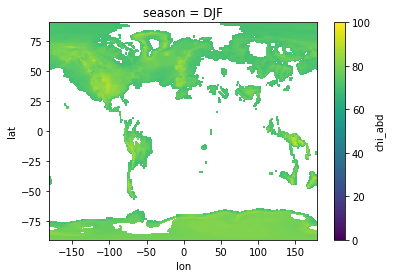

In [7]:
DJF.where(DJF>70).plot(vmin=0,vmax=100)
DJF.where(DJF>70).mean()

### JJA

In [8]:
JJA.to_dataframe().describe()

,chi_abd
count,54037.000000
mean,69.425041
std,13.109634
min,12.616662
25%,60.093792
50%,71.638351
75%,79.719353
max,93.622704


<xarray.DataArray 'chi_abd' ()>
array(33.51233, dtype=float32)
Coordinates:
    season   <U3 'JJA'

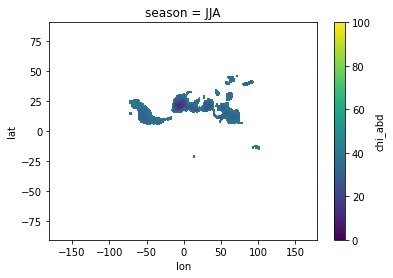

In [9]:
JJA.where(JJA<40).plot(vmin=0,vmax=100)
JJA.where(JJA<40).mean()

<xarray.DataArray 'chi_abd' ()>
array(78.59335, dtype=float32)
Coordinates:
    season   <U3 'JJA'

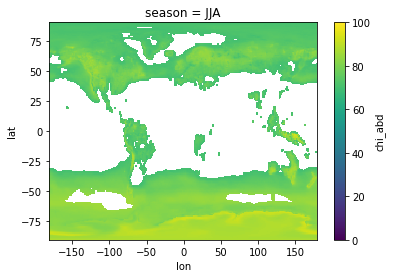

In [10]:
JJA.where(JJA>70).plot(vmin=0,vmax=100)
JJA.where(JJA>70).mean()

In [11]:
DJF.where(DJF<40).count()

<xarray.DataArray 'chi_abd' ()>
array(1726)
Coordinates:
    season   <U3 'DJF'

In [12]:
JJA.where(JJA<40).count()

<xarray.DataArray 'chi_abd' ()>
array(1234)
Coordinates:
    season   <U3 'JJA'

In [13]:
DJF.where(DJF>70).count()

<xarray.DataArray 'chi_abd' ()>
array(18870)
Coordinates:
    season   <U3 'DJF'

In [14]:
JJA.where(JJA>70).count()

<xarray.DataArray 'chi_abd' ()>
array(31225)
Coordinates:
    season   <U3 'JJA'

## chi_opt1

In [15]:
DJF=ds["chi_opt1"].sel(season="DJF")
JJA=ds["chi_opt1"].sel(season="JJA")

### DJF

,chi_opt1
count,28840.000000
mean,66.783470
std,9.745721
min,39.911243
25%,60.847252
50%,68.406891
75%,74.444443
max,92.969177


<xarray.DataArray 'chi_opt1' ()>
array(82.78481, dtype=float32)
Coordinates:
    season   <U3 'DJF'

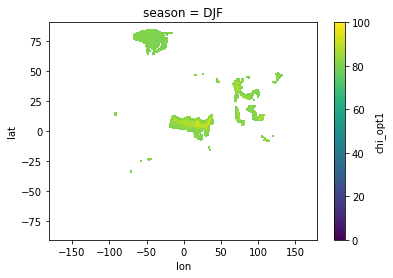

In [16]:
display(DJF.to_dataframe().describe())
DJF.where(DJF>80).plot(vmin=0,vmax=100)
DJF.where(DJF>80).mean()

<xarray.DataArray 'chi_opt1' ()>
array(82.78481, dtype=float32)
Coordinates:
    season   <U3 'DJF'

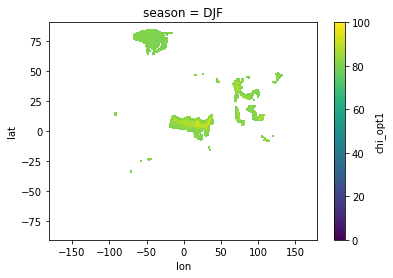

In [17]:
DJF.where(DJF>80).plot(vmin=0,vmax=100)
DJF.where(DJF>80).mean()

### JJA

,chi_opt1
count,37069.000000
mean,69.349098
std,10.379498
min,38.242340
25%,61.884693
50%,72.100433
75%,77.680450
max,94.437447


<xarray.DataArray 'chi_opt1' ()>
array(82.24336, dtype=float32)
Coordinates:
    season   <U3 'JJA'

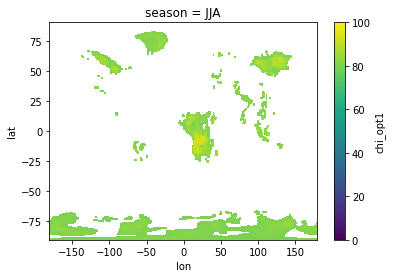

In [18]:
display(JJA.to_dataframe().describe())
JJA.where(JJA>80).plot(vmin=0,vmax=100)
JJA.where(JJA>80).mean()

## chi_hyg

In [19]:
DJF=ds["chi_hyg"].sel(season="DJF")
JJA=ds["chi_hyg"].sel(season="JJA")

In [20]:
df_hyg = ds.sel(season=["JJA","DJF"])["chi_hyg"].to_dataframe().reset_index().dropna()

In [21]:
(df_hyg[df_hyg["chi_hyg"]>75]["chi_hyg"].shape[0])/(df_hyg["chi_hyg"].shape[0])*100

10.553025826410373

### DJF

,chi_hyg
count,38320.000000
mean,53.895603
std,11.243815
min,20.234201
25%,45.205822
50%,52.160103
75%,63.676247
max,82.079102


<xarray.DataArray 'chi_hyg' ()>
array(65.38595, dtype=float32)
Coordinates:
    season   <U3 'DJF'

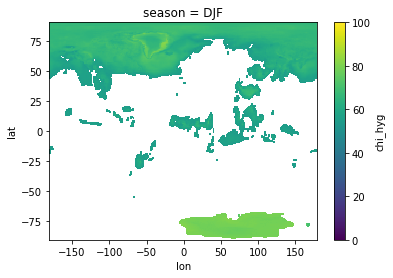

In [22]:
display(DJF.to_dataframe().describe())
DJF.where(DJF>55).plot(vmin=0,vmax=100)
DJF.where(DJF>55).mean()

<xarray.DataArray 'chi_hyg' ()>
array(36.648125, dtype=float32)
Coordinates:
    season   <U3 'DJF'

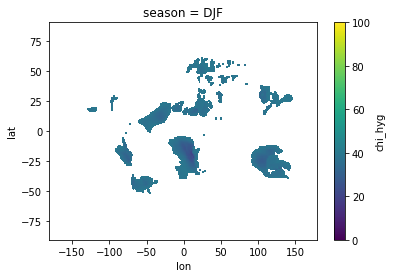

In [23]:
DJF.where(DJF<40).plot(vmin=0,vmax=100)
DJF.where(DJF<40).mean()

### JJA

,chi_hyg
count,47987.000000
mean,57.778465
std,11.998132
min,25.923870
25%,49.774948
50%,54.443611
75%,62.168022
max,86.626915


<xarray.DataArray 'chi_hyg' ()>
array(79.12572, dtype=float32)
Coordinates:
    season   <U3 'JJA'

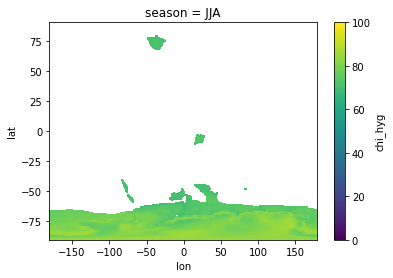

In [24]:
display(JJA.to_dataframe().describe())
JJA.where(JJA>70).plot(vmin=0,vmax=100)
JJA.where(JJA>70).mean()

<xarray.DataArray 'chi_hyg' ()>
array(36.522743, dtype=float32)
Coordinates:
    season   <U3 'JJA'

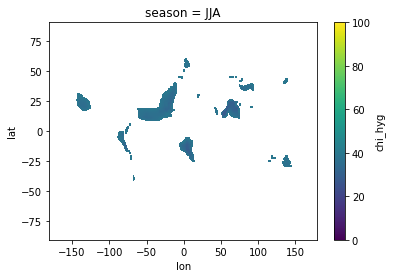

In [25]:
JJA.where(JJA<40).plot(vmin=0,vmax=100)
JJA.where(JJA<40).mean()